In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math, copy

In [7]:
prop = pd.read_csv('uae-real-estate.csv')
prop.head() #5

,Name,B_type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price
0,Elegant Unit| Golf Views| High-Floor| Prime Area,Apartment,24.463860,54.595603,747,0,1,Abu Dhabi,Yas Island,1300000
1,Sea & City View | Full Facilities | Prime Area,Apartment,24.487354,54.395122,"1,524",2,3,Abu Dhabi,Al Reem Island,1700000
2,Hot Offer|Furnished 2BR+M|Full Sea View|High F...,Apartment,24.492602,54.392677,"1,615",2,3,Abu Dhabi,Al Reem Island,1650000
3,Amazing Deal| Huge Layout | Big Terrace| Inves...,Apartment,24.484639,54.404103,"1,220",1,2,Abu Dhabi,Al Reem Island,800000
4,Luxurious Lifestyl|Exclusive Amenities|Invest Now,Apartment,24.538734,54.410601,"5,315",4,5,Abu Dhabi,Saadiyat Island,19000000


In [ ]:
def normalize(arr):
    max = arr.max()
    min = arr.min()


In [40]:
df = pd.DataFrame(prop,columns=['Area','Price'])
a = df.max().to_numpy()
x = np.array([(int(i.replace(',', ''))) for i in prop["Area"].to_numpy()]).astype(float)
y = np.array([prop["Price"].to_numpy()]).astype(float)
x_max = x.max()
y_max = y.max()
print(x_max)
print(y_max)

124000.0
750000000.0


In [41]:
x_train = np.array([(int(i.replace(',', '')))/x_max for i in prop["Area"].to_numpy()]).astype(float)
y_train = np.array([(i/y_max) for i in prop["Price"].to_numpy()]).astype(float)
print(x_train)
print(y_train)

[0.00602419 0.01229032 0.01302419 ... 0.01583871 0.14516129 0.01997581]
[0.00173333 0.00226667 0.0022     ... 0.003      0.00866667 0.0032    ]


In [42]:
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 29905


Text(0.5, 0, 'Size (sqm)')

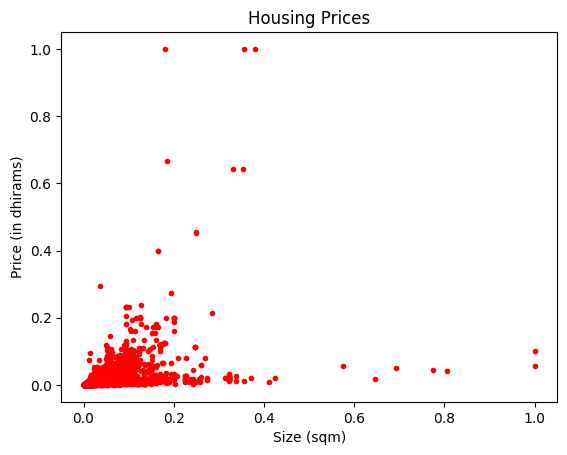

In [43]:
plt.scatter(x_train, y_train, marker='.', c='r')
plt.title("Housing Prices")
plt.ylabel('Price (in dhirams)')
plt.xlabel('Size (sqm)')

In [48]:
tmp_w = 0.5
tmp_b = 0.1

In [49]:
def compute_model_output(x, w, b):

    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

In [50]:
tmp_f_wb = compute_model_output(x_train, tmp_w, tmp_b)
print(tmp_f_wb)

[0.1030121  0.10614516 0.1065121  ... 0.10791935 0.17258065 0.1099879 ]


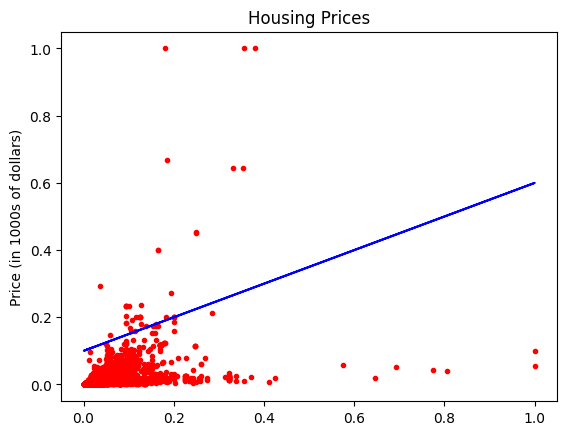

In [51]:
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='.', c='r',label='Actual Values')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.show()

In [52]:
def compute_cost(x, y, w, b):
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

In [53]:
total = compute_cost(x_train, y_train, tmp_w, tmp_b)
print(total)

0.005748289351090199


In [54]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [55]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []

    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i<100000:
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])

        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

In [57]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_final, b_final, tmp_alpha,iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.44e-04  dj_dw: -2.048e-04, dj_db:  4.753e-06   w:  2.138e-02, b: 5.10156e-03
Iteration 1000: Cost 1.43e-04  dj_dw: -2.033e-04, dj_db:  4.718e-06   w:  2.342e-02, b: 5.05420e-03
Iteration 2000: Cost 1.43e-04  dj_dw: -2.018e-04, dj_db:  4.684e-06   w:  2.544e-02, b: 5.00719e-03
Iteration 3000: Cost 1.43e-04  dj_dw: -2.003e-04, dj_db:  4.650e-06   w:  2.745e-02, b: 4.96052e-03
Iteration 4000: Cost 1.42e-04  dj_dw: -1.988e-04, dj_db:  4.616e-06   w:  2.945e-02, b: 4.91419e-03
Iteration 5000: Cost 1.42e-04  dj_dw: -1.974e-04, dj_db:  4.582e-06   w:  3.143e-02, b: 4.86820e-03
Iteration 6000: Cost 1.41e-04  dj_dw: -1.959e-04, dj_db:  4.549e-06   w:  3.339e-02, b: 4.82254e-03
Iteration 7000: Cost 1.41e-04  dj_dw: -1.945e-04, dj_db:  4.516e-06   w:  3.535e-02, b: 4.77722e-03
Iteration 8000: Cost 1.41e-04  dj_dw: -1.931e-04, dj_db:  4.483e-06   w:  3.728e-02, b: 4.73223e-03
Iteration 9000: Cost 1.40e-04  dj_dw: -1.917e-04, dj_db:  4.450e-06   w:  3.921e-02, b: 4.68757e-03


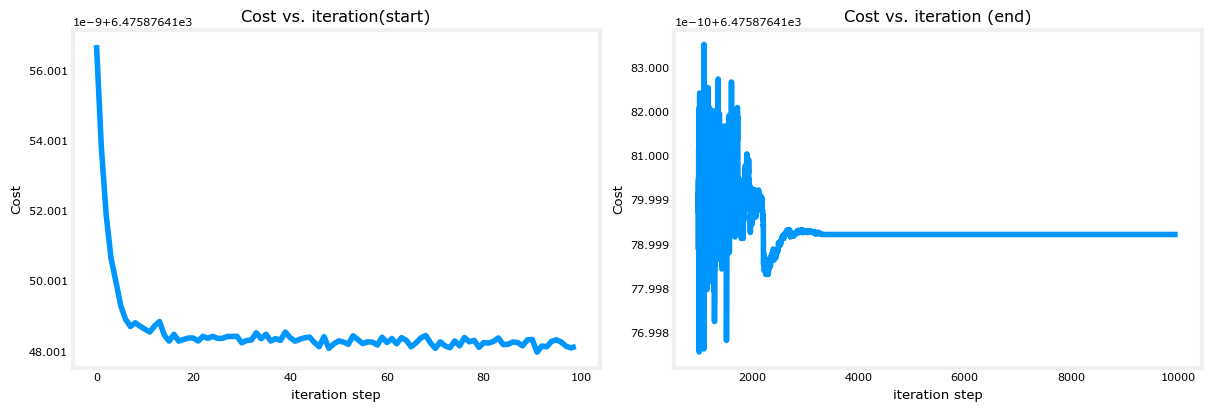

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()